In [1]:
import polars as pl
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
import matplotlib.cm as cm

group_dir = "/home/ubuntu/fg1"
exp_id    = "multiclient_cloud_500mbps_attack_withattacker"

In [2]:
# Read the group's entire data

lazy_results_df = (
  pl.scan_parquet(f"{group_dir}/results.parquet")
)

configurations_df = (
  pl.read_parquet(f"{group_dir}/configurations.parquet")
)

metrics_df = (
  pl.read_parquet(f"{group_dir}/metrics.parquet")
)
pd_metrics_df = (
  metrics_df
  .to_pandas()
  .sort_values(by=["node_type", "trial", "observation_timestamp"])
)

pd_metrics_df

,node_type,metric_type,trial,metric_value,observation_timestamp,exp_id
639,originserver,cpu_utilization,1,1.3,0,multiclient_cloud_500mbps_attack_noattacker
4473,originserver,cpu_utilization,1,1.2,0,multiclient_cloud_500mbps_attack_noattacker_dt...
4593,originserver,memory_utilization,1,245.0,0,multiclient_cloud_500mbps_attack_noattacker_dt...
4594,originserver,memory_utilization,1,245.0,0,multiclient_cloud_500mbps_attack_noattacker_dt...
4595,originserver,memory_utilization,1,251.0,0,multiclient_cloud_500mbps_attack_noattacker_dt...
...,...,...,...,...,...,...
18514,proxy,memory_utilization,3,4559.0,120,multiclient_cloud_500mbps_attack_withattacker
18515,proxy,memory_utilization,3,4559.0,120,multiclient_cloud_500mbps_attack_withattacker
22346,proxy,memory_utilization,3,1307.0,120,multiclient_cloud_500mbps_attack_withattacker_...
29987,proxy,memory_utilization,3,1073.0,120,multiclient_cloud_500mbps_attack_withattacker_...


In [3]:
%%time

summary_df = (
  lazy_results_df
  .filter(pl.col("exp_id") == exp_id)
  .groupby(["exp_id", "node_type", "trial"])
  .agg([
    pl.count("message_marker").alias("total_messages"),
    pl.col("message_timestamp").min().alias("min_timestamp_sec"),
    pl.col("message_timestamp").max().alias("max_timestamp_sec"),
  ])
  .sort(by=["node_type", "trial"])
  .with_columns([
    (pl.col("max_timestamp_sec") - pl.col("min_timestamp_sec")).alias("active_time_sec")
  ])
  .collect()
)

summary_df

CPU times: user 10.4 s, sys: 6.92 s, total: 17.3 s
Wall time: 7.66 s


exp_id,node_type,trial,total_messages,min_timestamp_sec,max_timestamp_sec,active_time_sec
str,str,i32,u32,f64,f64,f64
"""multiclient_cloud_500mbps_attack_withattacker""","""attacker""",1,519324,23.7214,43.562,19.8406
"""multiclient_cloud_500mbps_attack_withattacker""","""attacker""",2,512065,23.710376,43.626348,19.915972
"""multiclient_cloud_500mbps_attack_withattacker""","""attacker""",3,494855,23.6215,43.536566,19.915046
"""multiclient_cloud_500mbps_attack_withattacker""","""client1""",1,2755,0.0,98.639686,98.639686
"""multiclient_cloud_500mbps_attack_withattacker""","""client1""",2,2763,0.0,98.689026,98.689026
"""multiclient_cloud_500mbps_attack_withattacker""","""client1""",3,2757,0.0,98.603133,98.603133
"""multiclient_cloud_500mbps_attack_withattacker""","""client2""",1,2768,1.094695,99.74,98.645345
"""multiclient_cloud_500mbps_attack_withattacker""","""client2""",2,2772,1.075611,99.756779,98.681168
"""multiclient_cloud_500mbps_attack_withattacker""","""client2""",3,2774,0.992934,99.702832,98.709898


<IPython.core.display.Javascript object>


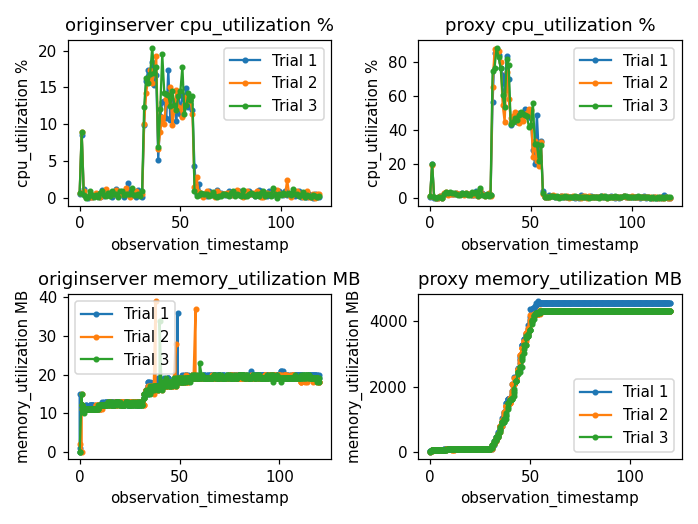

CPU times: user 678 ms, sys: 199 ms, total: 877 ms
Wall time: 465 ms


node_type,metric_type,trial,metric_value,observation_timestamp,exp_id
str,str,i64,f64,i64,str
"""proxy""","""cpu_utilization""",1,1.3,0,"""multiclient_cloud_500mbps_attack_noattacker"""
"""proxy""","""cpu_utilization""",1,20.4,1,"""multiclient_cloud_500mbps_attack_noattacker"""
"""proxy""","""cpu_utilization""",1,0.8,2,"""multiclient_cloud_500mbps_attack_noattacker"""
"""proxy""","""cpu_utilization""",1,0.9,3,"""multiclient_cloud_500mbps_attack_noattacker"""
"""proxy""","""cpu_utilization""",1,0.6,4,"""multiclient_cloud_500mbps_attack_noattacker"""
"""proxy""","""cpu_utilization""",1,1.5,5,"""multiclient_cloud_500mbps_attack_noattacker"""
"""proxy""","""cpu_utilization""",1,0.9,6,"""multiclient_cloud_500mbps_attack_noattacker"""
"""proxy""","""cpu_utilization""",1,2.9,7,"""multiclient_cloud_500mbps_attack_noattacker"""
"""proxy""","""cpu_utilization""",1,3.7,8,"""multiclient_cloud_500mbps_attack_noattacker"""


In [9]:
%%time

%matplotlib notebook

# Plot the node metrics for each device

exp_pd_metrics_df = pd_metrics_df[pd_metrics_df["exp_id"] == exp_id]

metric_types = exp_pd_metrics_df.metric_type.unique()
node_names = exp_pd_metrics_df.node_type.unique()
trials = exp_pd_metrics_df.trial.unique()

metric_type_map_extension = {
    "cpu_utilization": "%",
    "memory_utilization": "MB",
}

fig, axs = plt.subplots(len(node_names), len(metric_types))
for i, mt in enumerate(metric_types):
    for j, node_name in enumerate(node_names):
        for t in trials:
            # Filter each metric type observer node into its own tile, further filter by trial
            ax = axs[i, j]
            _df = exp_pd_metrics_df[(exp_pd_metrics_df["metric_type"] == mt) 
                             & (exp_pd_metrics_df["node_type"] == node_name)
                             & (exp_pd_metrics_df["trial"] == t)]
            
            # Normalize the timestamp and metric value of the experiment
            _df["observation_timestamp"] -= min(_df["observation_timestamp"])
            _df["metric_value"] -= min(_df["metric_value"])
            
            _df.plot(kind="line", x="observation_timestamp", y="metric_value", marker=".", ax=ax, label=f"Trial {t}")

            ylabel = mt + " " + metric_type_map_extension[mt]
            ax.set_ylabel(ylabel)
            ax.set_title(node_name + " " + ylabel)

fig.tight_layout()
plt.show()

metrics_df

In [5]:
%%time

exp_results_df = (
  lazy_results_df
  .filter(pl.col("exp_id") == exp_id)
)

exp_results_df

CPU times: user 272 µs, sys: 0 ns, total: 272 µs
Wall time: 291 µs


In [15]:
%%time

client_sends_df = (
  exp_results_df
  .filter(
    (pl.col("message_source").str.contains("client"))
    & (pl.col("node_type").str.contains("client"))
  )
)
client_recvs_df = (
  exp_results_df
  .filter(
    (pl.col("message_destination").str.contains("client"))
    & (pl.col("node_type").str.contains("client"))
  )
)

rtts_df = (
  client_sends_df
  .join(
    client_recvs_df,
    on=["trial", "node_type", "message_marker"],
    how="left",
  )
  .groupby(by=["exp_id", "trial", "node_type", "message_marker"])
  .agg([
    pl.col("message_timestamp").min().alias("send_time_sec"),
    pl.col("message_timestamp_right").min().alias("recv_time_sec"),
    pl.col("message_timestamp").min().alias("first_send_time_sec"),
    pl.col("message_timestamp").max().alias("last_send_time_sec"),
    pl.col("message_timestamp_right").min().alias("first_recv_time_sec"),
    pl.col("message_timestamp_right").max().alias("last_recv_time_sec"),
    pl.col("message_timestamp").count().alias("num_send_observations"),
    pl.col("message_timestamp_right").count().alias("num_recv_observations"),
    (pl.col("coap_retransmitted") == True).sum().alias("num_retransmissions"),
  ])
  .with_columns([
    (1e3 * (pl.col("first_recv_time_sec") - pl.col("first_send_time_sec"))).alias("rtt_ms_first_transmission"),
    (1e3 * (pl.col("first_recv_time_sec") - pl.col("last_send_time_sec"))).alias("rtt_ms_last_transmission"),
  ])
  .sort(by=["exp_id", "trial", "node_type", "message_marker"])
  .collect()
)

stats_df = (
  rtts_df
  .groupby(by=["exp_id", "trial", "node_type"])
  .agg([
    pl.col("message_marker").n_unique().alias("num_messages"),
    pl.col("send_time_sec").min().alias("global_first_send_time_sec"),
    pl.col("recv_time_sec").max().alias("global_last_recv_time_sec"),
  ])
  .with_columns([
    (pl.col("num_messages") / (pl.col("global_last_recv_time_sec") - pl.col("global_first_send_time_sec"))).alias("average_rps"),
  ])
  .filter(
    pl.col("node_type").str.contains("client")
  )
)

rtts_df = (
  rtts_df.join(
    stats_df,
    on=["exp_id", "trial", "node_type"],
    how="left",
  )
)

rtts_df

CPU times: user 22.8 s, sys: 13.3 s, total: 36.1 s
Wall time: 14.4 s


exp_id,trial,node_type,message_marker,send_time_sec,recv_time_sec,first_send_time_sec,last_send_time_sec,first_recv_time_sec,last_recv_time_sec,num_send_observations,num_recv_observations,num_retransmissions,rtt_ms_first_transmission,rtt_ms_last_transmission,num_messages,global_first_send_time_sec,global_last_recv_time_sec,average_rps
str,i32,str,i64,f64,f64,f64,f64,f64,f64,u32,u32,u32,f64,f64,u32,f64,f64,f64
"""multiclient_cloud_500mbps_attack_withattacker""",1,"""client1""",1,0.0,0.149068,0.0,0.0,0.149068,0.149068,1,1,0,149.067879,149.067879,1376,0.0,98.639024,13.949854
"""multiclient_cloud_500mbps_attack_withattacker""",1,"""client1""",2,0.164531,0.222032,0.164531,0.164531,0.222032,0.222032,1,1,0,57.500839,57.500839,1376,0.0,98.639024,13.949854
"""multiclient_cloud_500mbps_attack_withattacker""",1,"""client1""",3,0.224358,0.281186,0.224358,0.224358,0.281186,0.281186,1,1,0,56.828022,56.828022,1376,0.0,98.639024,13.949854
"""multiclient_cloud_500mbps_attack_withattacker""",1,"""client1""",4,0.283624,0.339105,0.283624,0.283624,0.339105,0.339105,1,1,0,55.480957,55.480957,1376,0.0,98.639024,13.949854
"""multiclient_cloud_500mbps_attack_withattacker""",1,"""client1""",5,0.341516,0.397237,0.341516,0.341516,0.397237,0.397237,1,1,0,55.720806,55.720806,1376,0.0,98.639024,13.949854
"""multiclient_cloud_500mbps_attack_withattacker""",1,"""client1""",6,0.399502,0.455478,0.399502,0.399502,0.455478,0.455478,1,1,0,55.976152,55.976152,1376,0.0,98.639024,13.949854
"""multiclient_cloud_500mbps_attack_withattacker""",1,"""client1""",7,0.457666,0.513289,0.457666,0.457666,0.513289,0.513289,1,1,0,55.623055,55.623055,1376,0.0,98.639024,13.949854
"""multiclient_cloud_500mbps_attack_withattacker""",1,"""client1""",8,0.515326,0.570618,0.515326,0.515326,0.570618,0.570618,1,1,0,55.291891,55.291891,1376,0.0,98.639024,13.949854
"""multiclient_cloud_500mbps_attack_withattacker""",1,"""client1""",9,0.573089,0.629166,0.573089,0.573089,0.629166,0.629166,1,1,0,56.077003,56.077003,1376,0.0,98.639024,13.949854


<IPython.core.display.Javascript object>


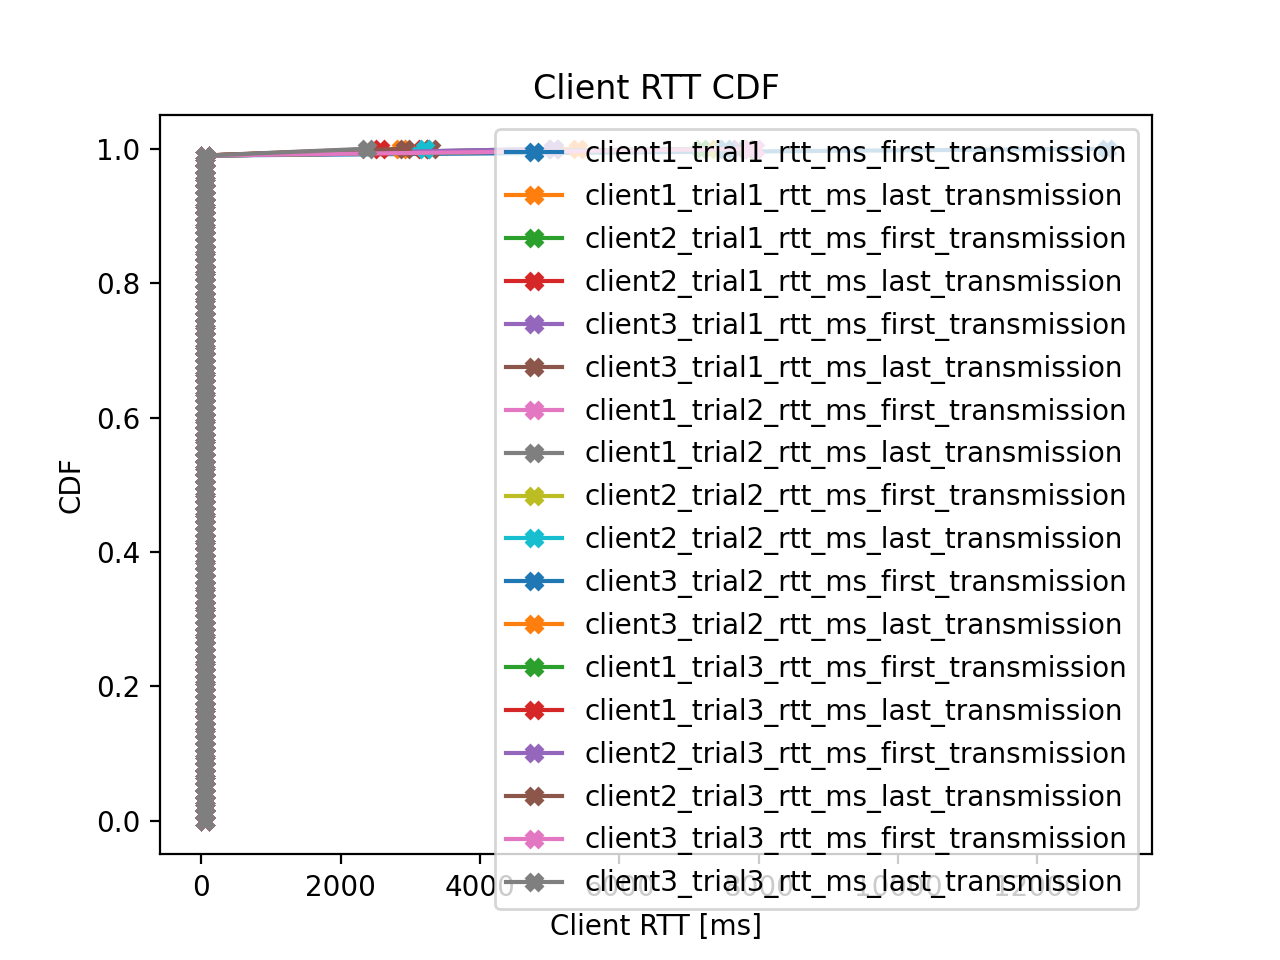

,percentile,trial,message_marker,send_time_sec,recv_time_sec,first_send_time_sec,last_send_time_sec,first_recv_time_sec,last_recv_time_sec,num_send_observations,num_recv_observations,num_retransmissions,rtt_ms_first_transmission,rtt_ms_last_transmission,num_messages,global_first_send_time_sec,global_last_recv_time_sec,average_rps
count,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.00000,101.000000,1.010000e+02
mean,0.500000,3.0,369635.472871,59.386047,59.442389,59.386047,59.403601,59.442389,59.442389,1.019802,1.019802,0.019802,131.063746,76.567771,1329.0,4.41761,101.831288,1.364285e+01
std,0.293002,0.0,218337.884975,30.328378,30.300448,30.328378,30.320770,30.300448,30.300448,0.199007,0.199007,0.199007,778.152149,230.474577,0.0,0.00000,0.000000,1.785217e-15
min,0.000000,3.0,140.000000,4.417610,4.472019,4.417610,4.417610,4.472019,4.472019,1.000000,1.000000,0.000000,52.891970,52.891970,1329.0,4.41761,101.831288,1.364285e+01
25%,0.250000,3.0,1157.000000,23.030375,23.070620,23.030375,23.030375,23.070620,23.070620,1.000000,1.000000,0.000000,53.410769,53.410769,1329.0,4.41761,101.831288,1.364285e+01
50%,0.500000,3.0,497028.000000,65.894659,65.921043,65.894659,65.894659,65.921043,65.921043,1.000000,1.000000,0.000000,53.506017,53.506017,1329.0,4.41761,101.831288,1.364285e+01
75%,0.750000,3.0,498036.000000,83.881777,83.894716,83.881777,83.881777,83.894716,83.894716,1.000000,1.000000,0.000000,53.794980,53.794980,1329.0,4.41761,101.831288,1.364285e+01
max,1.000000,3.0,498976.000000,101.831833,101.831288,101.831833,101.831833,101.831288,101.831288,3.000000,3.000000,2.000000,7873.966217,2369.872808,1329.0,4.41761,101.831288,1.364285e+01


In [10]:
plot_args = {
    "kind"  : "line",
    "y"     : "percentile",
    "marker": "X",
}

pd_rtts_df = rtts_df.to_pandas()

trials = pd_rtts_df["trial"].unique()
clients = pd_rtts_df["node_type"].unique()
rtts = ["rtt_ms_first_transmission", "rtt_ms_last_transmission"]

ax = None
for t in trials:
  for c in clients:
    cdfdf = pd_rtts_df[(pd_rtts_df["trial"] == t) & (pd_rtts_df["node_type"] == c)]
    cdfdf = cdfdf.quantile(q=tuple(_q/100 for _q in range(0, 101, 1))).reset_index().rename(columns={"index":"percentile"})
    for rtt in rtts:
        label = f"{c}_trial{t}_{rtt}"
        ax = cdfdf.plot(x=rtt, label=label, ax = ax, **plot_args)

ax.set_ylabel("CDF")
ax.set_xlabel("Client RTT [ms]")
ax.set_title("Client RTT CDF")
plt.show()

cdfdf.describe()

<IPython.core.display.Javascript object>


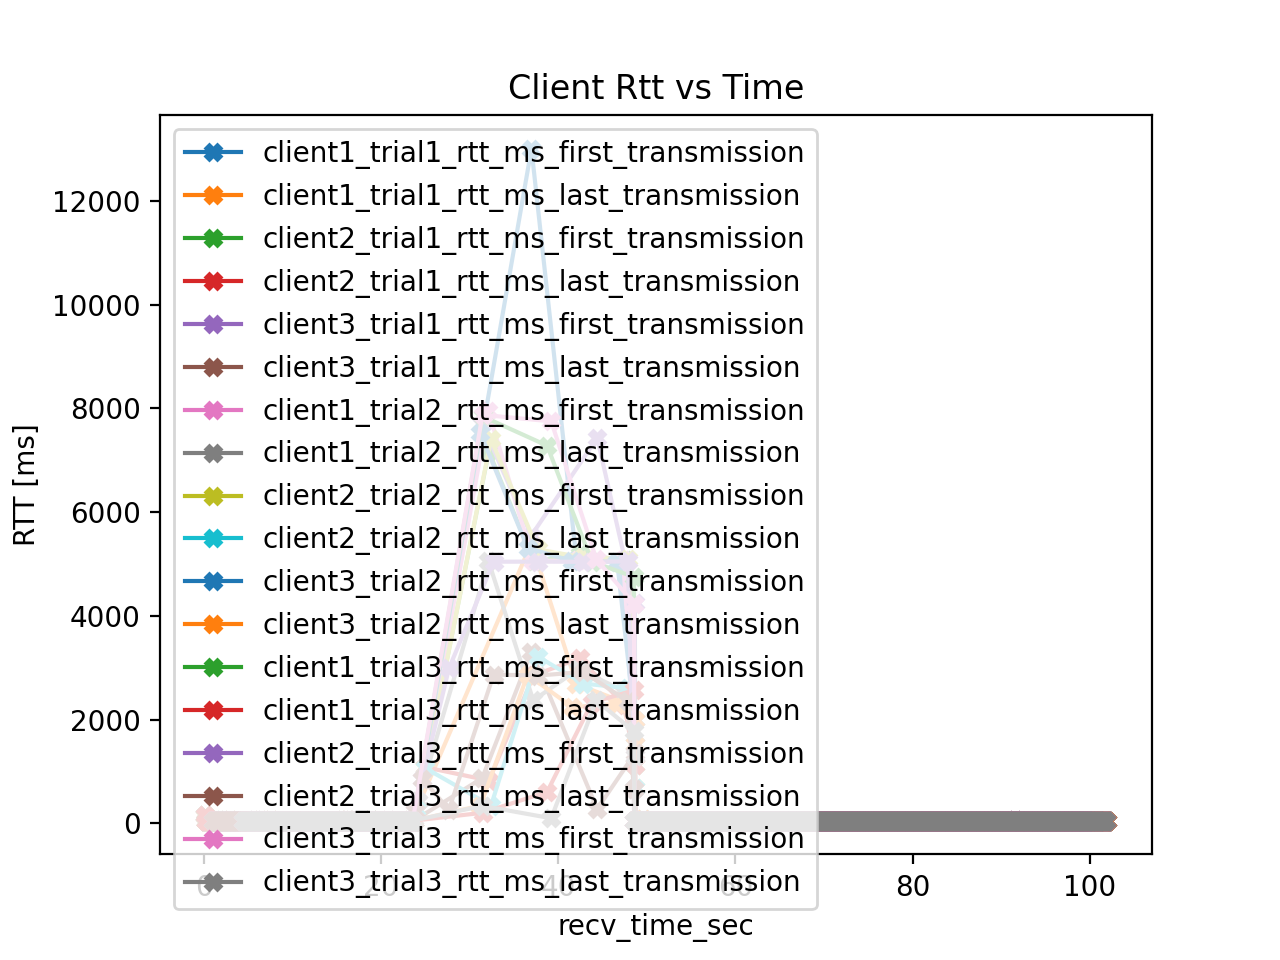

In [11]:
ignore_clients = {}
ignore_trials = {}

plot_args = {
    "kind"  : "line",
    "x"     : "recv_time_sec",
    "marker": "X",
}

# `trials`, `clients`, and `rtts` derived from above

ax = None
for t in trials:
    if t in ignore_trials:
        continue
        
    for c in clients:
        if c in ignore_clients:
            continue
            
        client_trial_df = pd_rtts_df[(pd_rtts_df["trial"] == t) & (pd_rtts_df["node_type"] == c)]
        
        for rtt in rtts:
          label = f"{c}_trial{t}_{rtt}"
          ax = client_trial_df.plot(label=label, y=rtt, **plot_args, ax=ax)

ax.set_title("Client Rtt vs Time")
ax.set_ylabel("RTT [ms]")
plt.show()

<IPython.core.display.Javascript object>


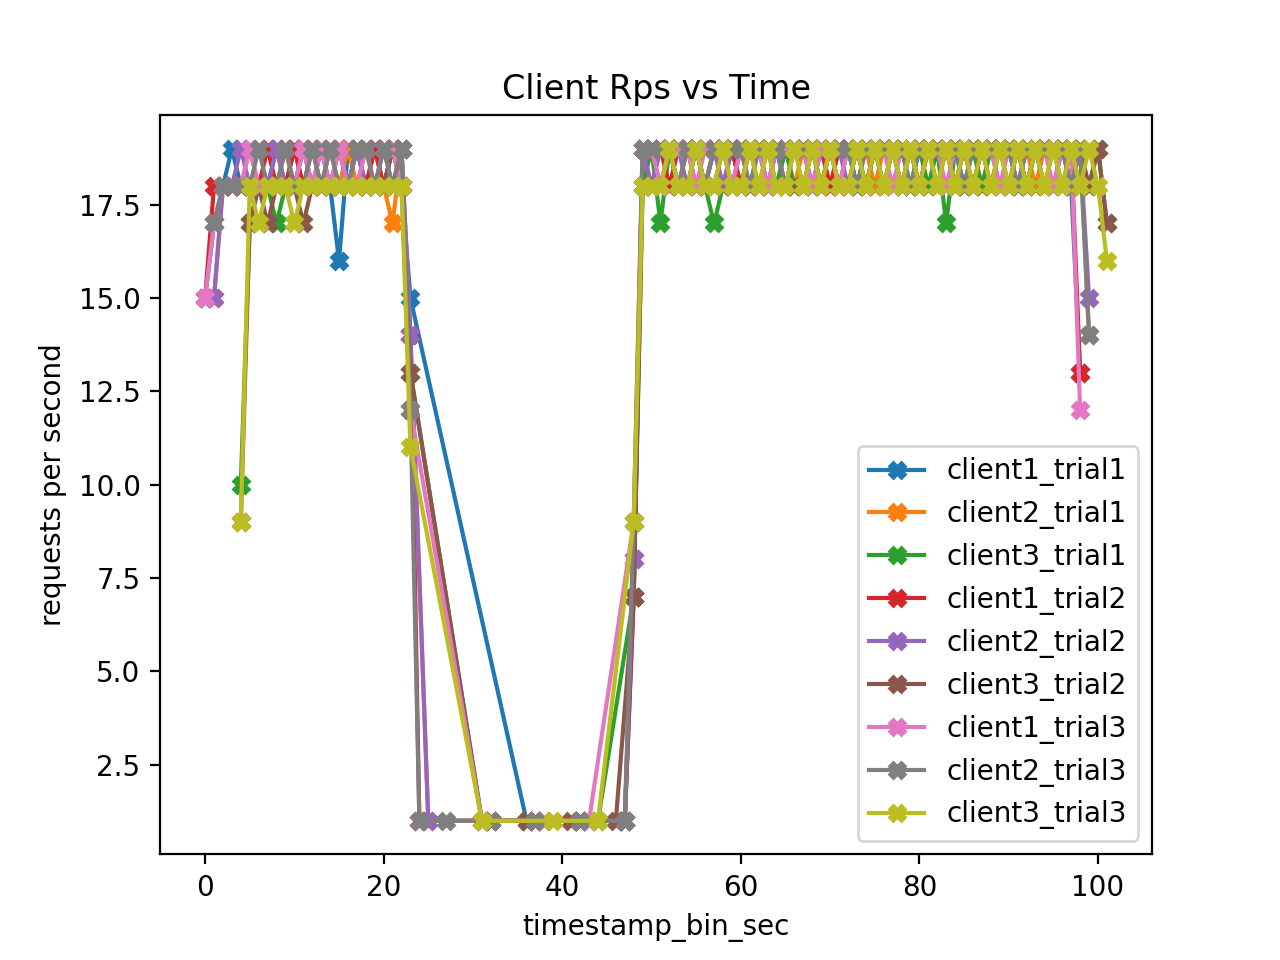

,timestamp_bin_sec,node_type,packets_per_second
0,0.0,client1,15
1,1.0,client1,17
2,1.0,client2,17
3,2.0,client1,18
4,2.0,client2,18
...,...,...,...
231,98.0,client3,18
232,99.0,client2,14
233,99.0,client3,19
234,100.0,client3,18


In [12]:
ignore_clients = {}
ignore_trials = {}

plot_args = {
    "kind"  : "line",
    "x"     : "timestamp_bin_sec",
    "y"     : "packets_per_second",
    "marker": "X",
}

# `trials`, `clients`, and `rtts` derived from above

ax = None
for t in trials:
    if t in ignore_trials:
        continue
        
    trial_df = pd_rtts_df[pd_rtts_df["trial"] == t]
    trial_df["timestamp_bin_sec"] = np.floor(trial_df["recv_time_sec"])
    time_stats_df = trial_df.groupby(by=["timestamp_bin_sec", "node_type"]).agg(\
                                             packets_per_second=("average_rps", "count")).reset_index()
    
    for c in clients:
        if c in ignore_clients:
            continue
            
        client_trial_df = time_stats_df[time_stats_df["node_type"] == c]
        
        label = f"{c}_trial{t}"
        ax = client_trial_df.plot(label=label, ax=ax, **plot_args)

ax.set_title("Client Rps vs Time")
ax.set_ylabel("requests per second")
plt.show()

time_stats_df

<IPython.core.display.Javascript object>


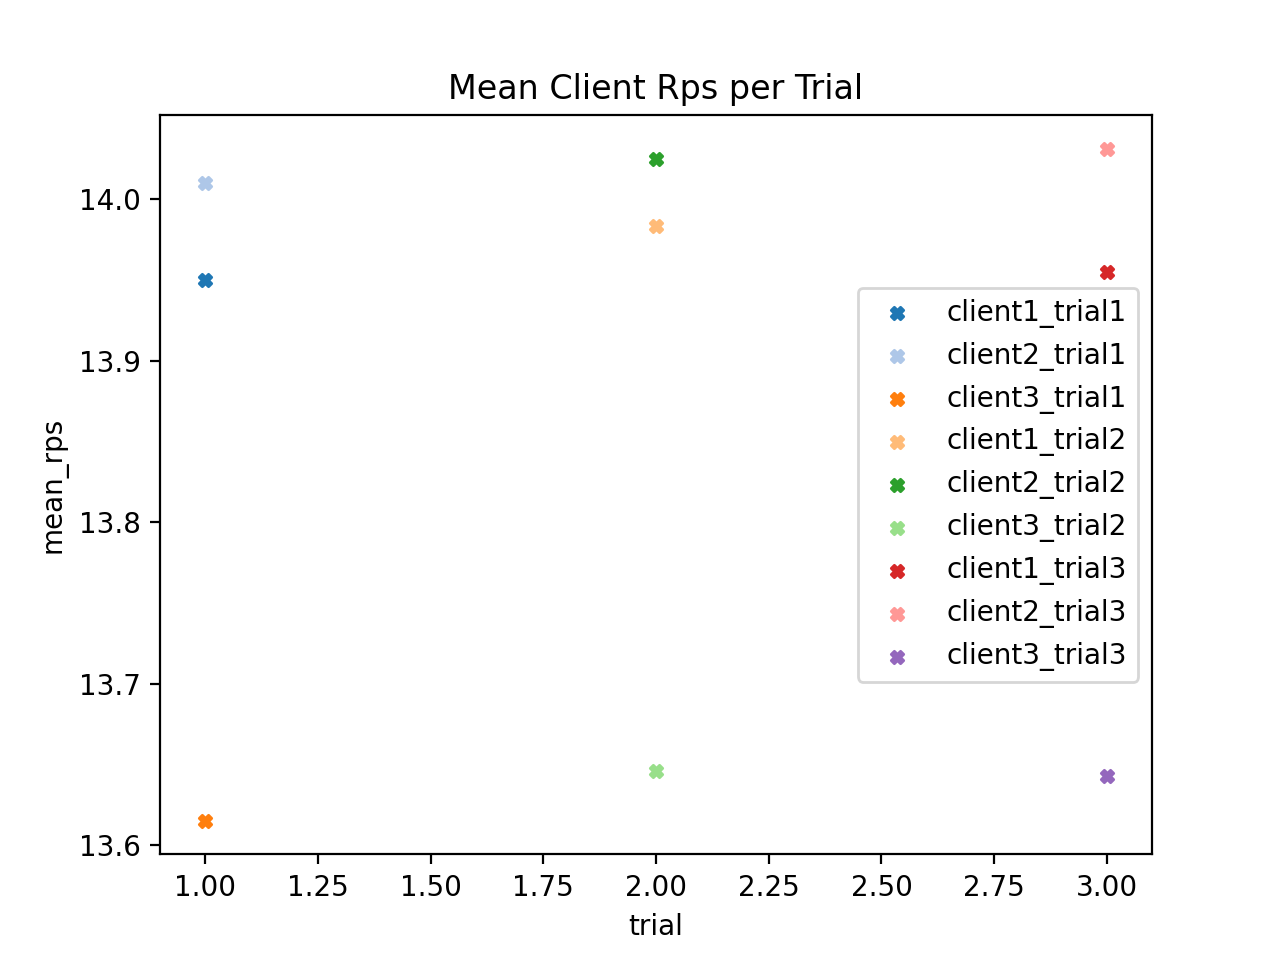

   trial   mean_rps
0      1  13.858271
1      2  13.884704
2      3  13.876325


,node_type,trial,mean_rps
0,client1,1,13.949854
1,client1,2,13.983416
2,client1,3,13.955026
3,client2,1,14.009874
4,client2,2,14.025057
5,client2,3,14.031102
6,client3,1,13.615084
7,client3,2,13.645640
8,client3,3,13.642848


In [13]:
per_trial_stats_df = (
  pd_rtts_df
  .groupby(by=["node_type", "trial"])
  .agg(
    mean_rps=("average_rps", "mean")
  )
  .reset_index()
)

plot_args = {
    "kind"  : "scatter",
    "x"     : "trial",
    "y"     : "mean_rps",
    "marker": "X",
}

# `trials`, `clients`, and `rtts` derived from above

colors = iter([plt.cm.tab20(i) for i in range(20)])

ax = None
for t in trials:
    for c in clients:
        
        grouped_client_trial_df = per_trial_stats_df[(per_trial_stats_df["trial"] == t) & (per_trial_stats_df["node_type"] == c)]
        
        label = "hi"
        label=f"{c}_trial{t}"
        ax = grouped_client_trial_df.plot(ax=ax, label=label, color=[next(colors)], **plot_args)
        
print(per_trial_stats_df.groupby(by=["trial"]).mean().reset_index()[["trial", "mean_rps"]])
       
ax.set_title("Mean Client Rps per Trial")
plt.show()

per_trial_stats_df

<IPython.core.display.Javascript object>


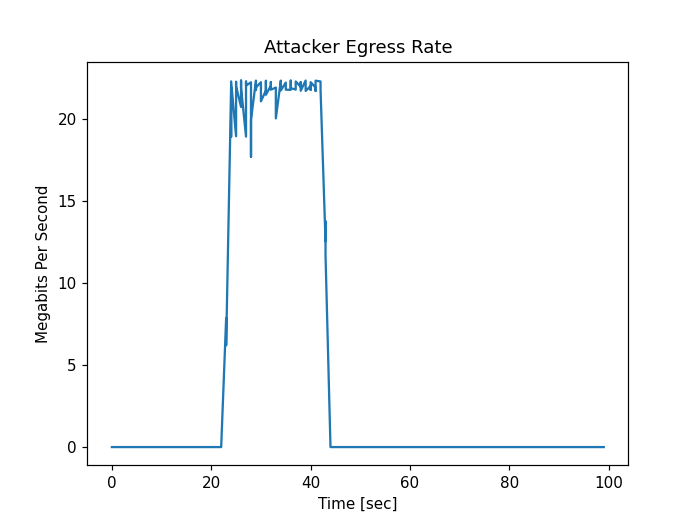

CPU times: user 10.1 s, sys: 8.06 s, total: 18.1 s
Wall time: 7.56 s


,trial,timestamp_bin,sum_bytes,megabytes_per_second,megabits_per_second
0,1,0.0,0.0,0.0,0.0
0,1,1.0,0.0,0.0,0.0
0,1,2.0,0.0,0.0,0.0
0,1,3.0,0.0,0.0,0.0
0,1,4.0,0.0,0.0,0.0
...,...,...,...,...,...
0,1,95.0,0.0,0.0,0.0
0,1,96.0,0.0,0.0,0.0
0,1,97.0,0.0,0.0,0.0
0,1,98.0,0.0,0.0,0.0


In [21]:
%%time

ratedf = (
  exp_results_df
  .filter(
    (pl.col("node_type") == "attacker")
    & (pl.col("message_destination") == "proxy")
  )
  .select(["exp_id", "trial", "message_marker", "message_timestamp", "message_size"])
  .collect()
  .to_pandas()
)

ratedf["timestamp_bin"] = np.floor(ratedf["message_timestamp"])
bins = list(range(configurations_df.filter(pl.col("exp_id") == exp_id)["client_duration"].min()))

tdf = ratedf.groupby(by=["trial", "timestamp_bin"]).agg(sum_bytes=('message_size', 'sum')).reset_index()

for trial in tdf.trial.unique():
    for missing_timestamp in set(bins) - set(tdf.timestamp_bin.unique()):
        _df = pd.DataFrame([[trial, missing_timestamp, 0.0]], columns=["trial", "timestamp_bin", "sum_bytes"])
        tdf = pd.concat([_df, tdf])

tdf.sort_values(by="timestamp_bin", inplace=True)
tdf["megabytes_per_second"] = 1e-6 * tdf["sum_bytes"]
tdf["megabits_per_second"] = 8 * tdf["megabytes_per_second"]

ax = tdf.plot(kind="line", x="timestamp_bin", y="megabits_per_second")
ax.set_title("Attacker Egress Rate")
ax.set_ylabel("Megabits Per Second")
ax.set_xlabel("Time [sec]")
ax.get_legend().remove()
plt.show()

tdf

In [ ]:
%%time

run_dtls = configurations_df.filter(pl.col("exp_id") == exp_id)["run_proxy_with_dtls"].to_list()[0]
if run_dtls:
  attack_message_receiver = "attacker"
else:
  attack_message_receiver = "receiver"

attacker_send_df = (
  exp_results_df
  .filter(
    (pl.col("node_type") == "attacker")
    & (pl.col("message_destination") == "proxy")
  )
)

proxy_df = (
  exp_results_df
  .filter(
    (pl.col("node_type") == "proxy")
  )
)

receiver_df = (
  exp_results_df
  .filter(
    (pl.col("node_type") == attack_message_receiver)
    & (pl.col("message_destination") == attack_message_receiver)
  )
)

attack_dbg_df = (
  attacker_send_df
  .join(
    proxy_df,
    on=["exp_id", "trial", "message_marker"],
    how="left",
    suffix="_proxy"
  )
  .join(
    receiver_df,
    on=["exp_id", "trial", "message_marker"],
    how="left",
    suffix="_receiver"
  )
  .groupby(by=["exp_id", "trial", "message_marker"])
  .agg([
    pl.col("coap_code_receiver").first().alias("coap_code"),
    pl.col("message_timestamp").min().alias("first_send_time_sec"),
    (1e3 * (pl.col("message_timestamp_proxy").min() - pl.col("message_timestamp").min())).alias("attacker_to_proxy_ms"),
    (1e3 * (pl.col("message_timestamp_receiver").max() - pl.col("message_timestamp_proxy").min())).alias("proxy_to_attacker_ms"),
    (1e3 * (pl.col("message_timestamp_receiver").max() - pl.col("message_timestamp").min())).alias("attacker_to_receiver_rtt_ms"),
    pl.col("message_timestamp_receiver").min().alias("first_recv_time_sec"),
  ])
  .drop_nulls()
  .sort(by="first_send_time_sec")
)

attack_dbg_df = attack_dbg_df.collect().to_pandas()

attack_dbg_df

In [18]:
%matplotlib inline

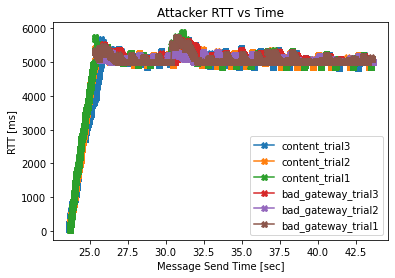

In [19]:
# Plot attacker rtt vs time

plot_args = {
  "kind": "line",
  "x": "first_send_time_sec",
  "y": "attacker_to_receiver_rtt_ms",
  "marker": "X",
}

coap_codes = attack_dbg_df["coap_code"].unique()
trials = attack_dbg_df["trial"].unique()

ax = None
for coap_code in coap_codes:
    if coap_code is None:
        continue
    for t in trials:
      _df = attack_dbg_df[(attack_dbg_df["coap_code"] == coap_code) & (attack_dbg_df["trial"] == t)]
      label = f"{coap_code}_trial{t}"
      ax = _df.plot(label=label, ax=ax, **plot_args)

ax.set_title("Attacker RTT vs Time")
ax.set_ylabel("RTT [ms]")
ax.set_xlabel("Message Send Time [sec]")
plt.show()

/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


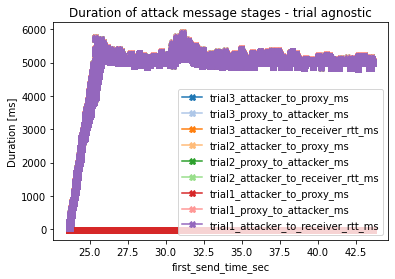

In [20]:
# Plot the duration of different stages of the attack messages

plot_args = {
  "kind": "line",
  "x": "first_send_time_sec",
  "marker": "X",
}

colors = iter([plt.cm.tab20(i) for i in range(20)])

rtts = ["attacker_to_proxy_ms", "proxy_to_attacker_ms", "attacker_to_receiver_rtt_ms"]

ax = None
for t in trials:
  for rtt in rtts:
    label = f"trial{t}_{rtt}"
    ax = attack_dbg_df.plot(y=rtt, ax=ax, label=label, color=[next(colors)], **plot_args)

ax.set_ylabel("Duration [ms]")
ax.set_title("Duration of attack message stages - trial agnostic")
ax.legend()

plt.show()